In [1]:
from myst_nb import glue
from pint import UnitRegistry
import matplotlib.pyplot as plt
import numpy as np

ureg = UnitRegistry()
ureg.setup_matplotlib()
ureg.default_format = "~H"
Q_ = ureg.Quantity
# plt.ion()

def gu(name, quantity):
    glue(name, quantity, display=False)
    glue(name + "_mag", quantity.magnitude, display=False)
    glue(name + "_units", quantity.units, display=False)

G = Q_(6.6742E-11, "m**3 / (kg * s**2)")
M = Q_(5.974E24, "kg")
R_E = Q_(6378, "km")
g_0 = (G * M / R_E**2).to("m / s**2")
gu("G", G)
gu("M", M)
gu("R_E", R_E)
gu("g_0", round(g_0, 3))

# Chapter 1.4 - Mass, Force, and Newton's Law of Gravitation

Forces can be transmitted by direct contact or by a potential field. Potential fields include gravity, magnetism, and electricity. As you learned in Physics, the force due to a potential field is inversely proportional to the square of the distance between two sources in the field.

In a gravitational field, the sources are **masses**. Therefore, the force between two masses is:

$$F = G \frac{m_1 m_2}{r^2}$$

where $m_1$ and $m_2$ are the two masses, $r$ is the distance between them, and $G$ is Newton's gravitational constant. This is Newton's law of gravitation. In SI units, $G$ has the value {glue:}`G`.

Due to the extremely small size of $G$, masses either have to be very large or very close together to generate a significant gravitational force.

When one of the masses is much larger than the other, we usually group the larger mass $M$ with the $G$ and $r^2$ terms:

$$F = m \left(\frac{GM}{r^2}\right)$$

The second term on the right side is typically called the **acceleration due to gravity**:

$$g = \frac{GM}{r^2}$$

Therefore, the **weight** of a smaller mass in the gravitational field of a much larger mass is:

$$W = mg$$

For the surface of the Earth, we can plug in $R_E =$ {glue:}`R_E` and $M =$ {glue:}`M` to find $g =$ {glue:}`g_0`.

We can also determine the variation of $g$ with altitude for the Earth. Referenced to the gravity at the surface of the Earth, we find:

$$\frac{g}{g_0} = \frac{1}{\left(1 + z/R_E\right)^2}$$

where $z$ is the height above the surface of the Earth. This variation is plotted in {numref}`g/g_0`.

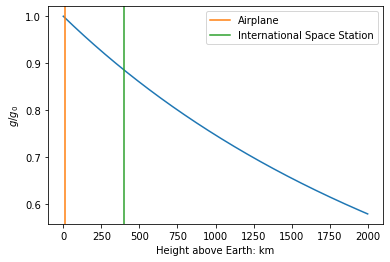

In [8]:
z = np.arange(0, 2000, 1) * ureg.km
g = 1/(1 + z/R_E)**2
fig, ax = plt.subplots()
ax.plot(z, g)
ax.set_xlabel(f"Height above Earth: {z.units}")
ax.set_ylabel("$g/g_0$")
ax.axvline(10, color="C1", label="Airplane")
ax.axvline(400, color="C2", label="International Space Station")
ax.legend()
glue("g/g_0", fig, display=False)

```{glue:figure} g/g_0
:name: "g/g_0"

Variation of $g/g_0$ with altitude.
```

On {numref}`g/g_0`, you can see that gravity varies significantly with altitude. However, for most "normal" altitudes, there isn't much variation. At 10 km, a typical cruise altitude, the value of $g$ is almost the same as $g_0$. Even at the height of the ISS (400 km), $g$ is still 90% of the value of $g_0$.

Using the value of $g$ at the ISS, we find that an astronaut still has a weight, $mg\neq 0$. That is, the force of gravity is still acting on them. However, there is no support under their feet, so they do not feel their weight and we say they are experiencing **weightlessness** although they are not **weightless**.